<a href="https://colab.research.google.com/github/naryst/EnergyDrinks_segmentation/blob/master/YOLO_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 530.4/530.4 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.5/199.5 kB 14.2 MB/s eta 0:00:00


In [2]:
!pip install roboflow -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.3 MB/s eta 0:00:00


In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="i5a31149ZXb5vXFpPtOS")
project = rf.workspace("ds-sdvyu").project("aml_assignment2")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.88, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to aml_assignment2-1 in yolov8:: 100%|██████████| 728/728 [00:00<00:00, 1944.98it/s]


In [4]:
!yolo task=segment mode=train model=yolov8n-seg.pt data={dataset.location}/data.yaml epochs=30 imgsz=800 plots=True

100% 6.73M/6.73M [00:00<00:00, 89.4MB/s]
Ultralytics YOLOv8.0.88 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/aml_assignment2-1/data.yaml, epochs=30, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, k

In [6]:
from IPython import display
display.clear_output()
from IPython.display import display, Image
import os
HOME = os.getcwd()
print(HOME)

/content


/content


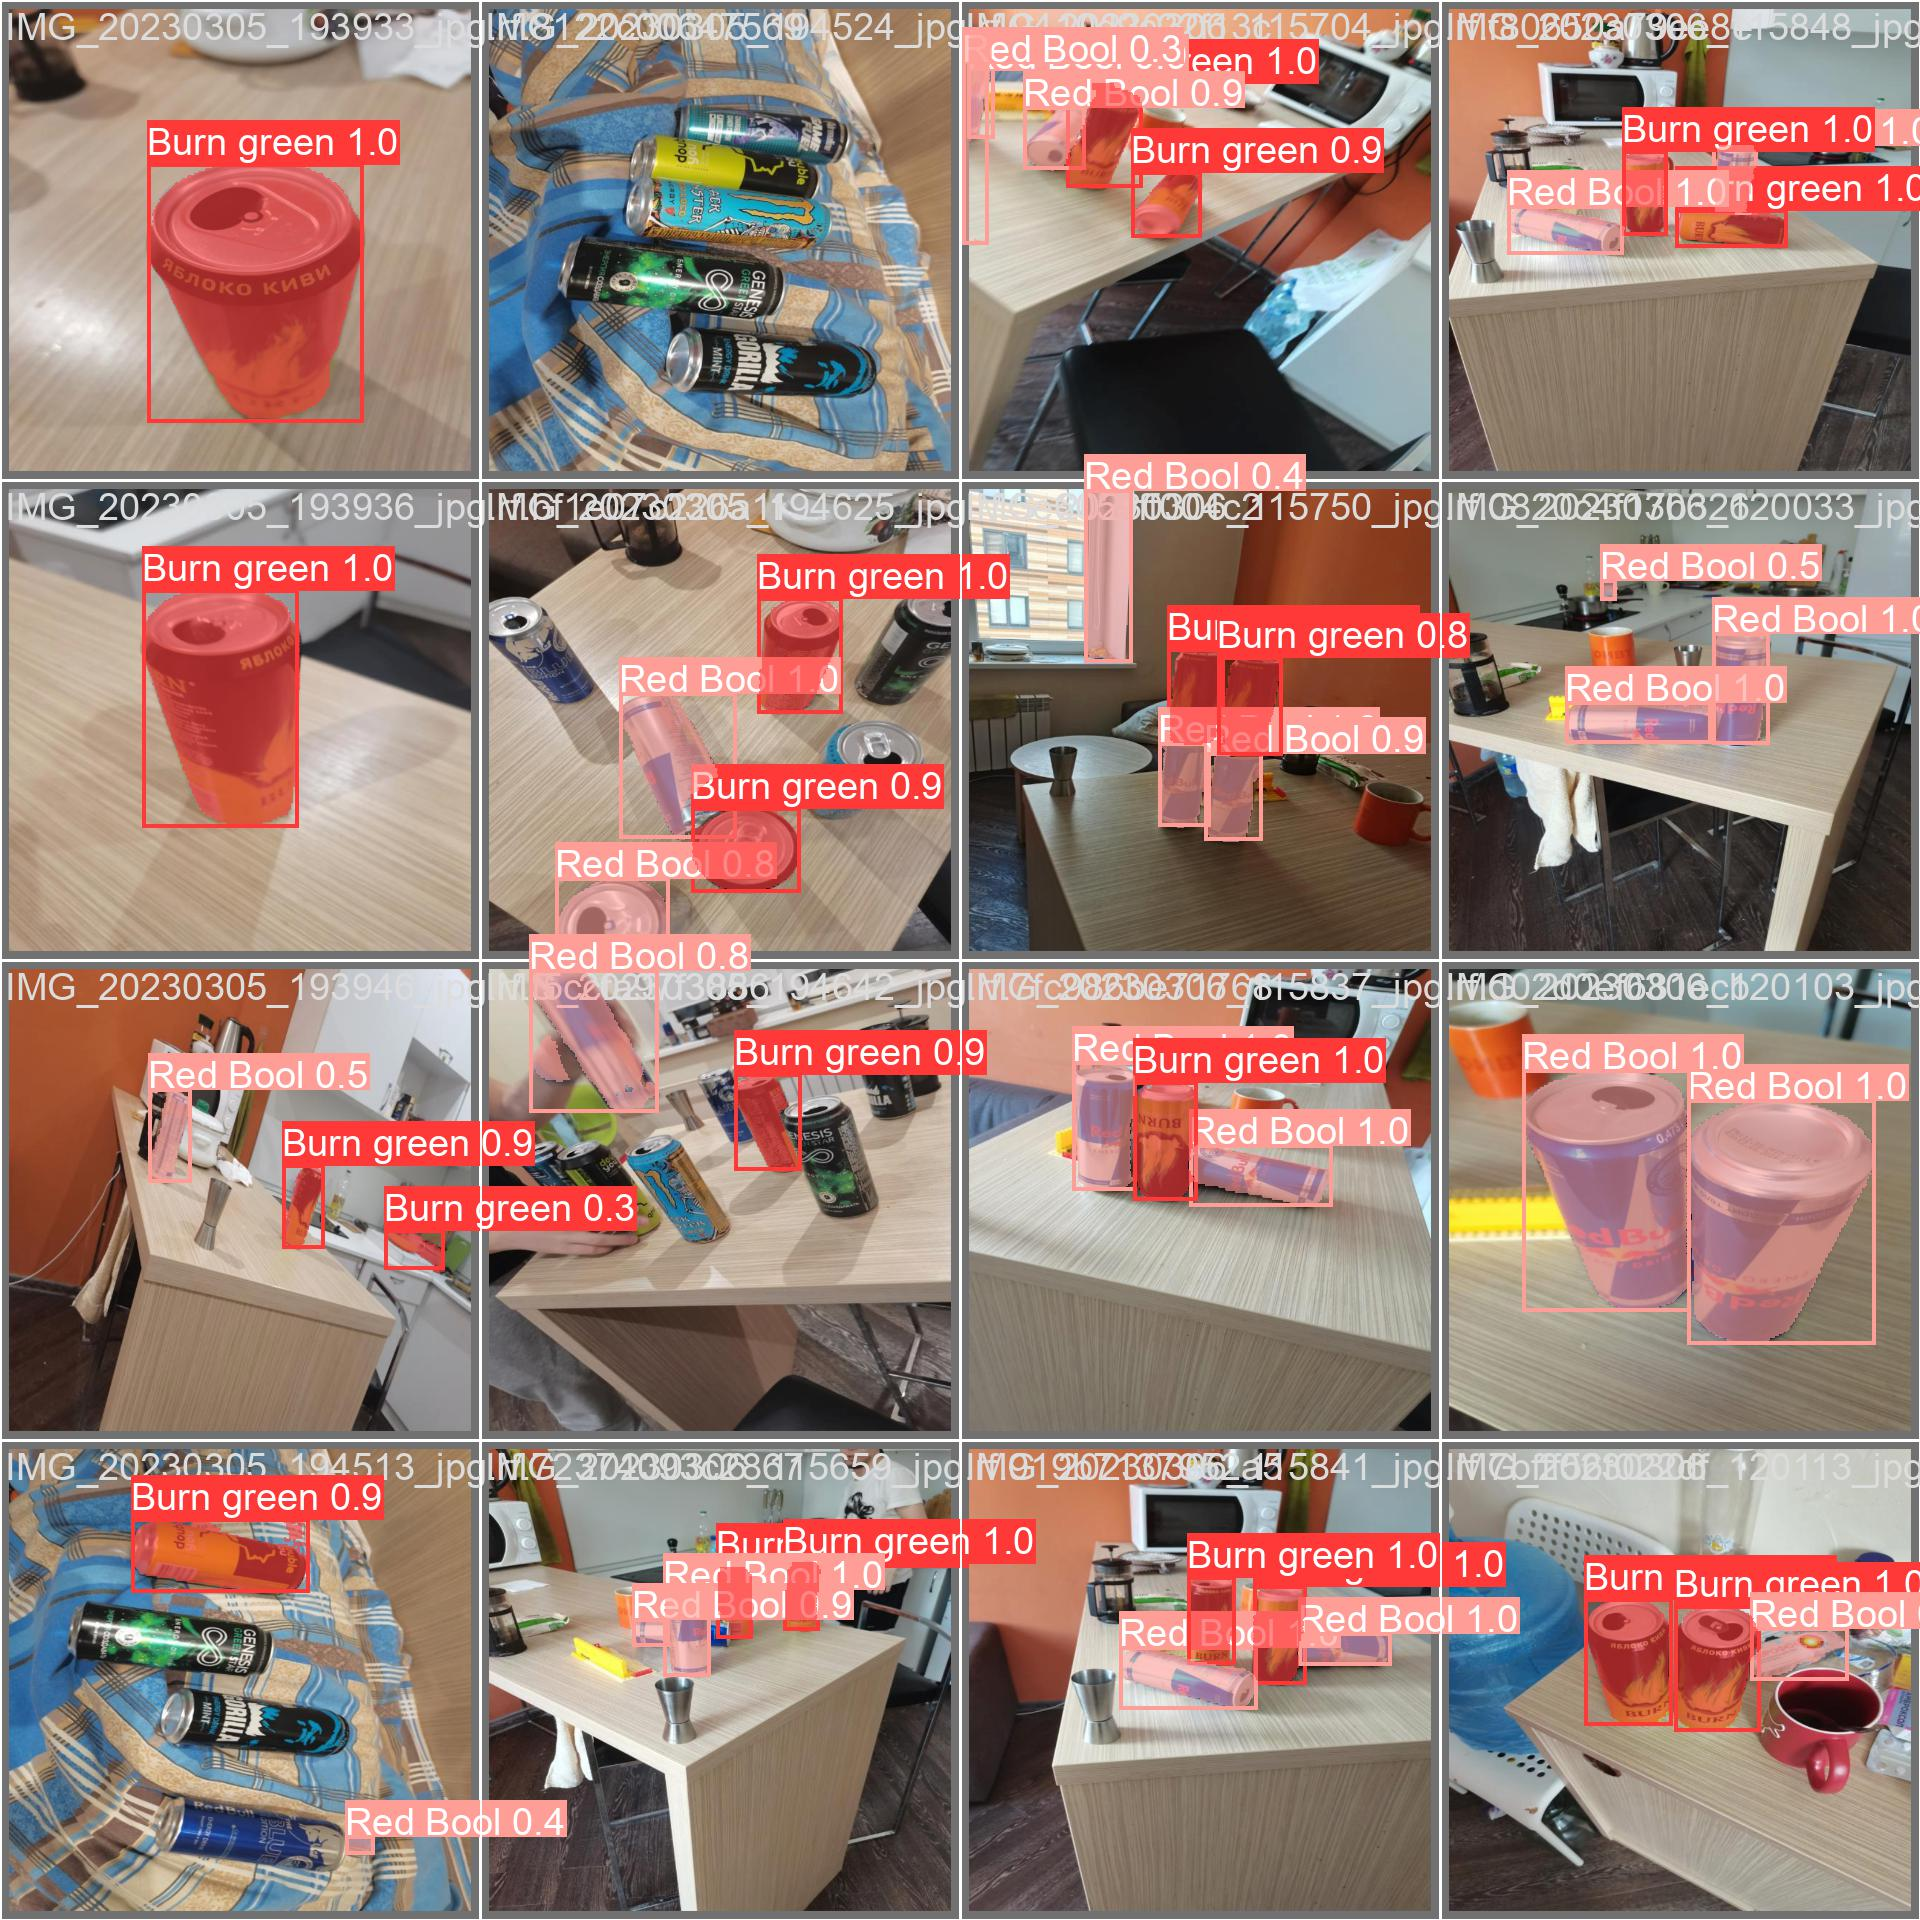

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=600)

In [10]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.85 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.88 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258454 parameters, 0 gradients, 12.0 GFLOPs

image 1/16 /content/aml_assignment2-1/test/images/IMG-20230305-WA0004_jpg.rf.467a2ad5aaa337594bd1bd0e93a6d930.jpg: 800x800 (no detections), 13.0ms
image 2/16 /content/aml_assignment2-1/test/images/IMG_20230305_193938_jpg.rf.0e076d420df985c0cc65d9ad31a913d0.jpg: 800x800 1 Burn green, 12.9ms
image 3/16 /content/aml_assignment2-1/test/images/IMG_20230305_194011_jpg.rf.303a287a147a4a80286763a2edbb75f7.jpg: 800x800 1 Burn green, 12.9ms
image 4/16 /content/aml_assignment2-1/test/images/IMG_20230305_194159_jpg.rf.91c0ab7088b20dda429dd7977381b5fb.jpg: 800x800 1 Red Bool, 12.9ms
image 5/16 /content/aml_assignment2-1/test/images/IMG_20230305_194212_jpg.rf.b4afd423348454e204a0f6e59a983bb0.jpg: 800x800 1 Red Bool, 12.9ms
image 6/16 /content/aml_assignment2-1/test/images/IMG_20230305_194322_jpg.rf.1cfd26e68b7ac41e6a5b1f

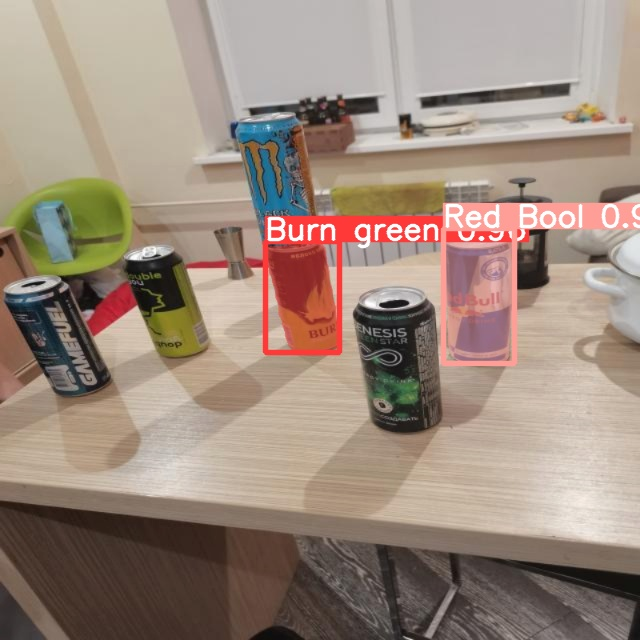

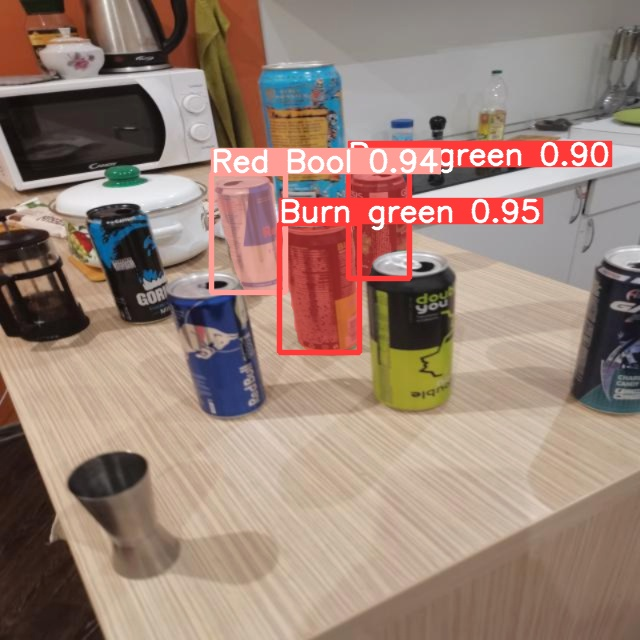

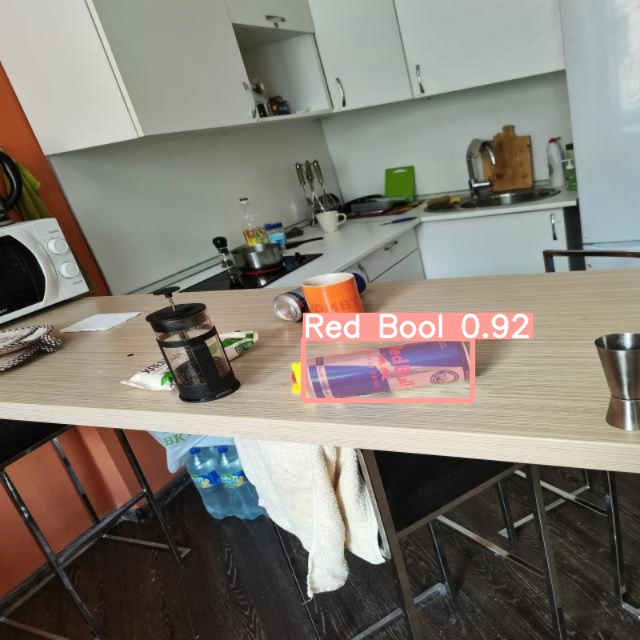

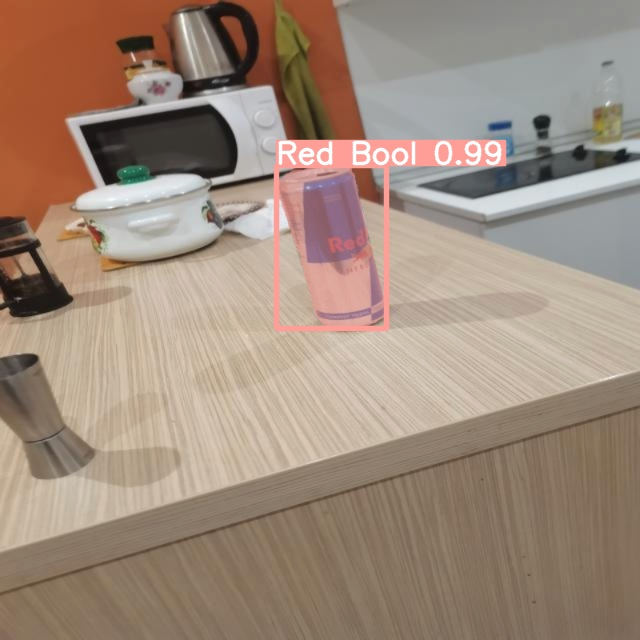

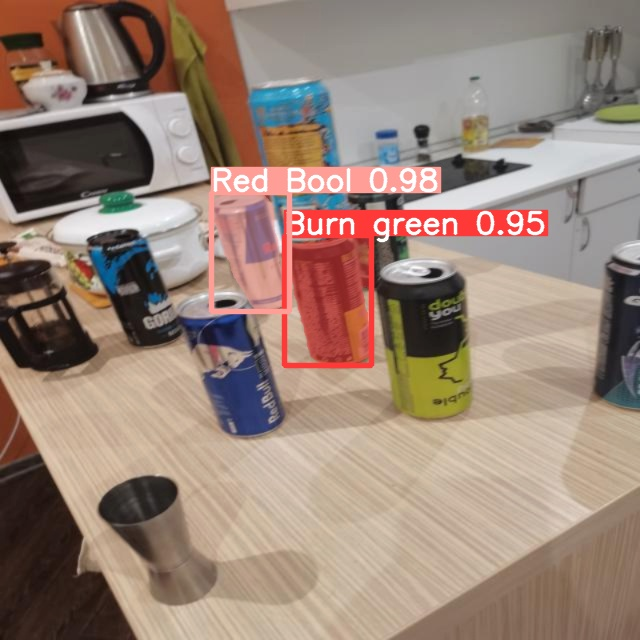

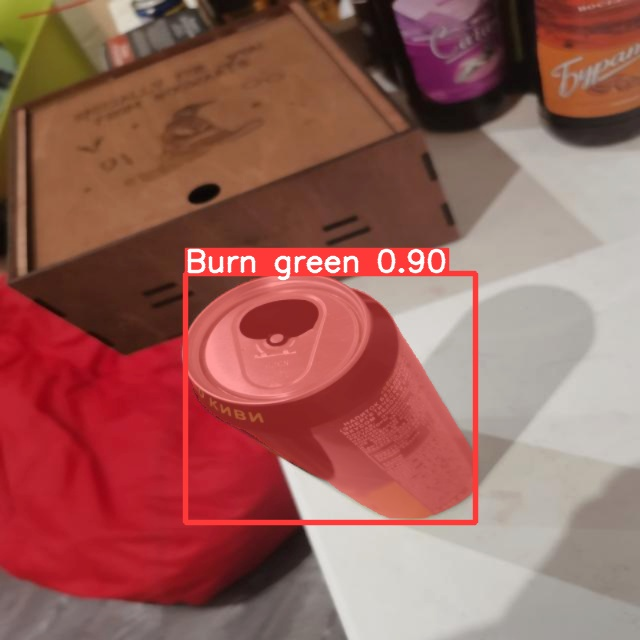

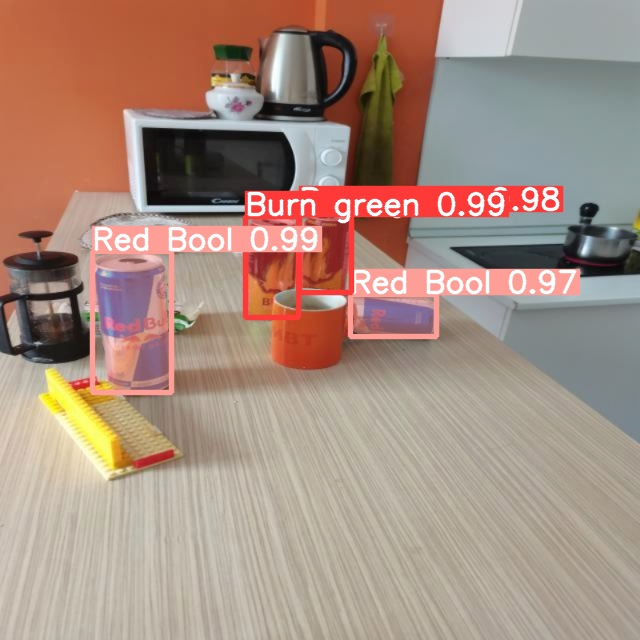

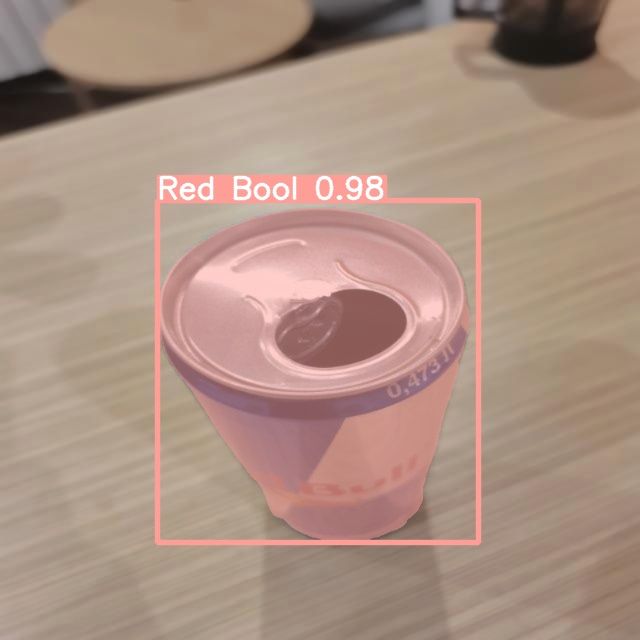

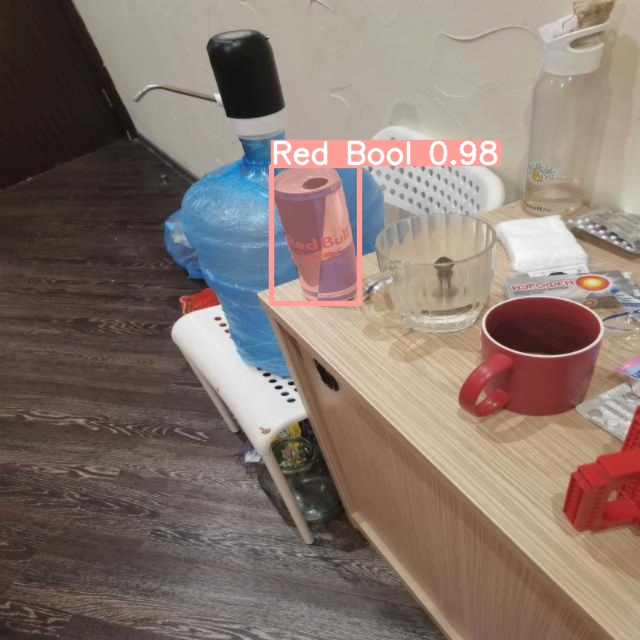

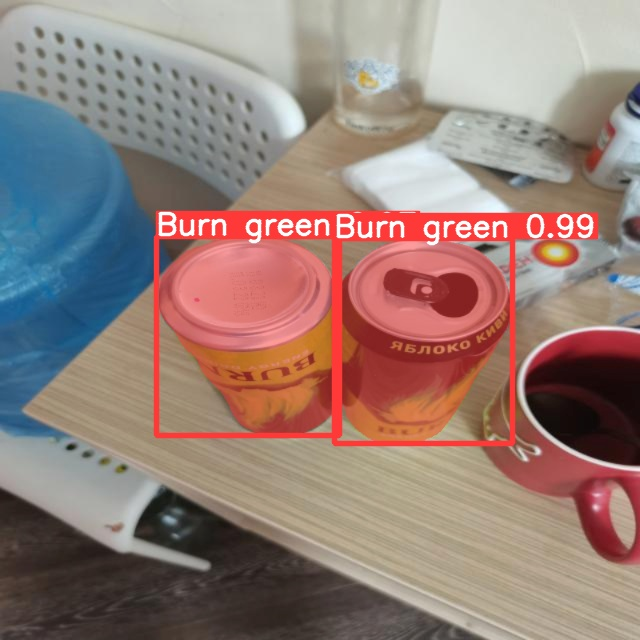

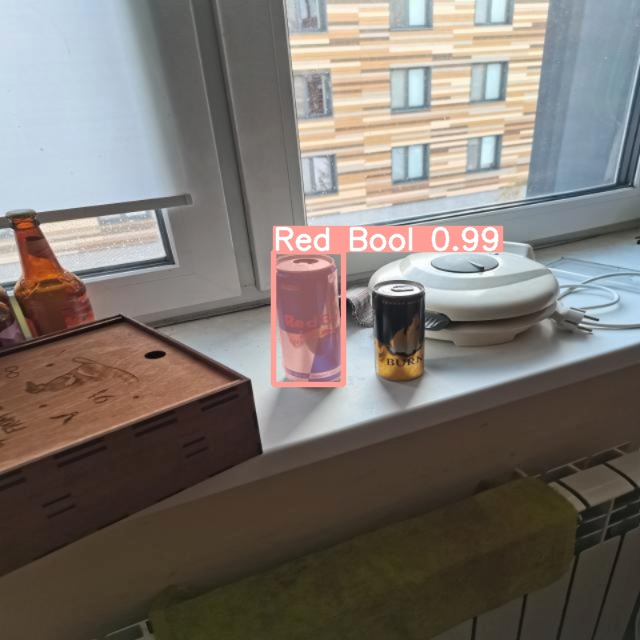

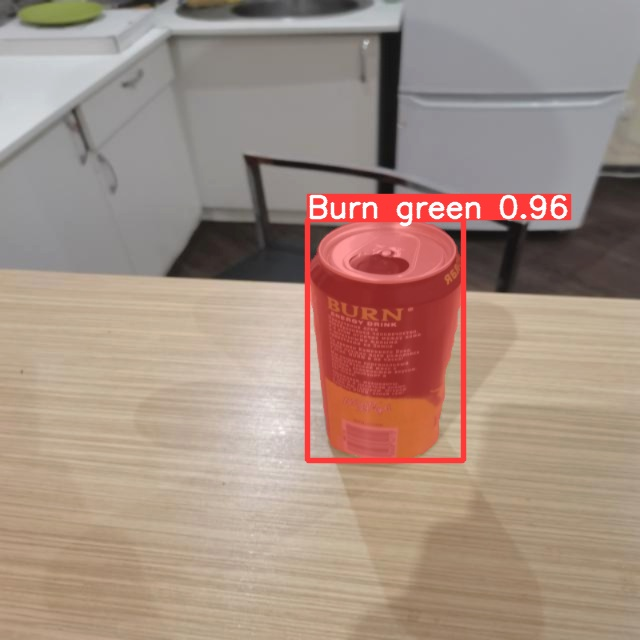

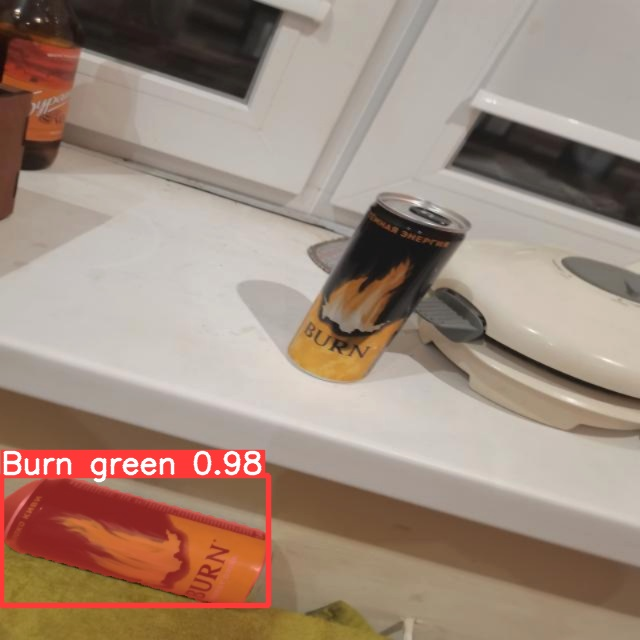

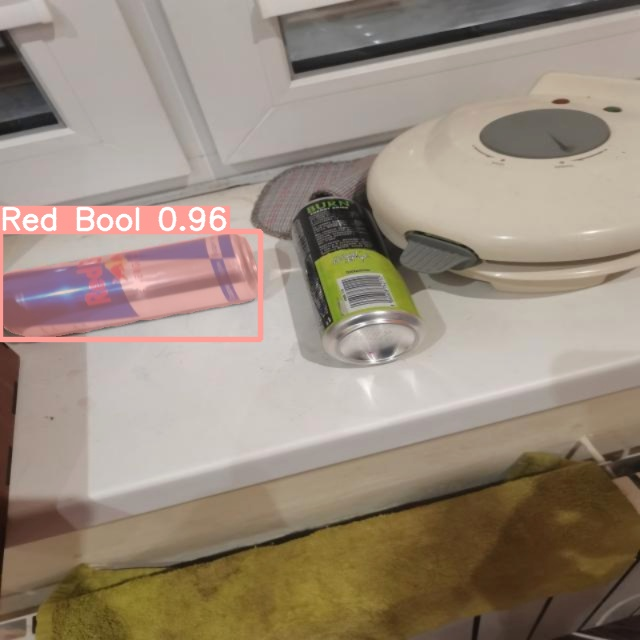

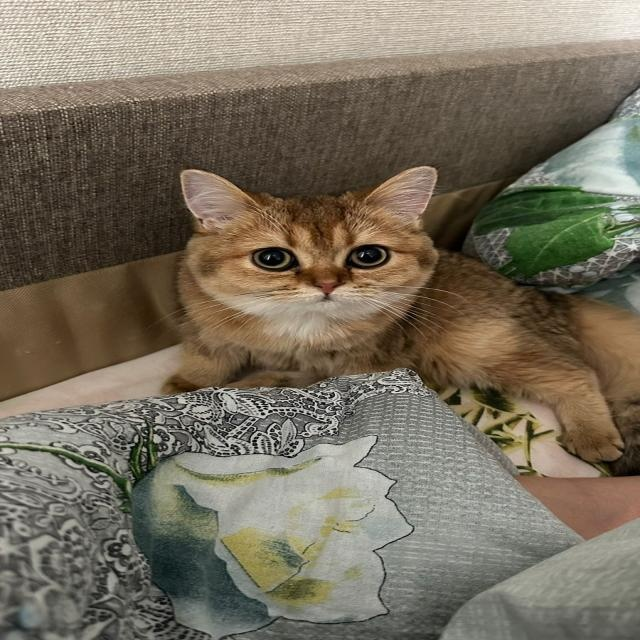

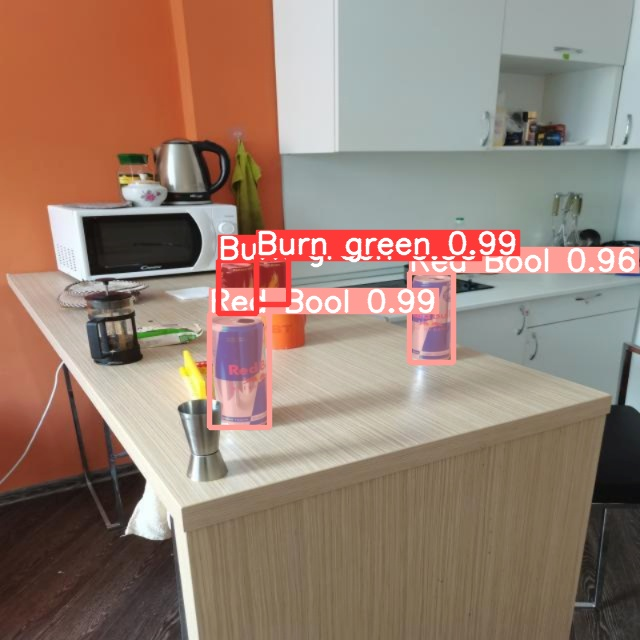

In [12]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict2/*.jpg'):
      display(Image(filename=image_path, width=600))
      print("\n")

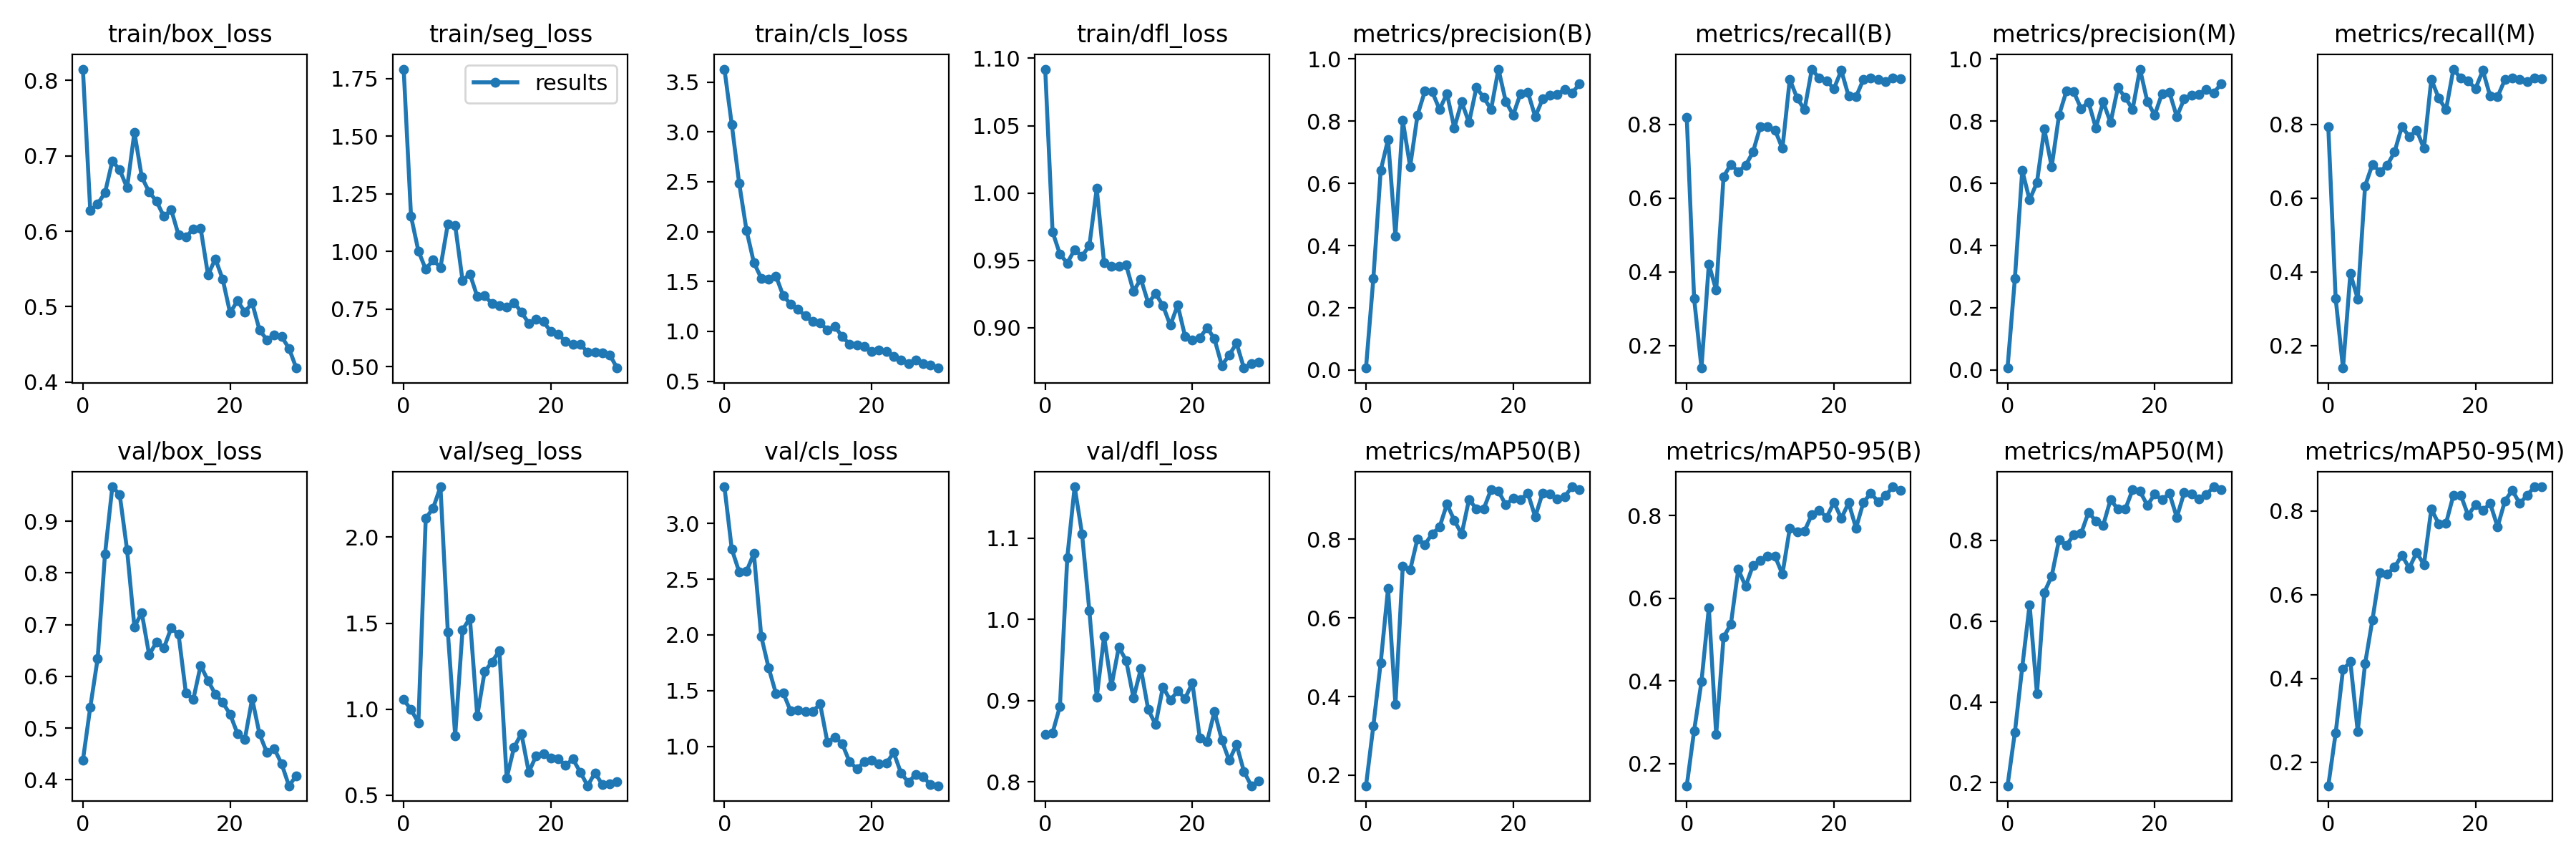

In [13]:
Image('/content/runs/segment/train/results.png')